<font size="6"> **Exploratory Data Analysis** </font>

In [1]:
%%capture
%run 00_mlmod_load_data.ipynb

# Multicollinearity

In [2]:
alpha_factors = ['Mean_Reversion_Sector_Neutral_Smoothed', 'Momentum_1YR_Smoothed', 'Overnight_Sentiment_Smoothed']
quant_features = ['adv_120d', 'adv_20d', 'dispersion_120d', 'dispersion_20d', 'market_vol_120d', 'market_vol_20d']

In [3]:
all_factors[quant_features].describe().T

,count,mean,std,min,25%,50%,75%,max
adv_120d,361284.0,7.375182e-19,1.000001,-1.728520,-0.866027,0.000000,0.866027,1.728520
adv_20d,361284.0,7.375182e-20,1.000001,-1.728520,-0.866027,0.000000,0.866027,1.728520
dispersion_120d,361284.0,1.242492e-02,0.000629,0.008892,0.012028,0.012307,0.012706,0.017939
dispersion_20d,361284.0,1.257350e-02,0.001714,0.008892,0.011336,0.012314,0.013554,0.018303
market_vol_120d,361284.0,1.252853e-01,0.019350,0.086119,0.114585,0.120704,0.132684,0.184001
market_vol_20d,361284.0,1.216308e-01,0.043465,0.050347,0.092718,0.112689,0.143227,0.305171


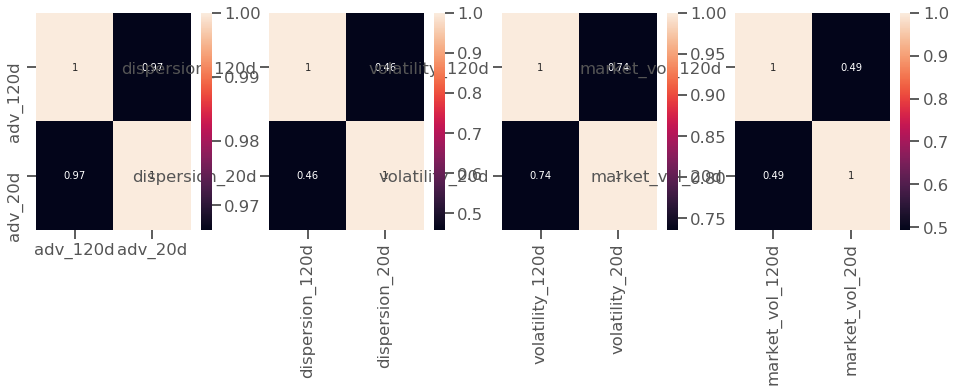

In [4]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
ax = axs[0]
sns.heatmap(all_factors[['adv_120d', 'adv_20d']].corr(),annot=True, ax=ax)
ax = axs[1]
sns.heatmap(all_factors[['dispersion_120d', 'dispersion_20d']].corr(),annot=True, ax=ax)
ax = axs[2]
sns.heatmap(all_factors[['volatility_120d', 'volatility_20d']].corr(),annot=True, ax=ax)
ax = axs[3]
sns.heatmap(all_factors[['market_vol_120d', 'market_vol_20d']].corr(),annot=True, ax=ax)

plt.show()

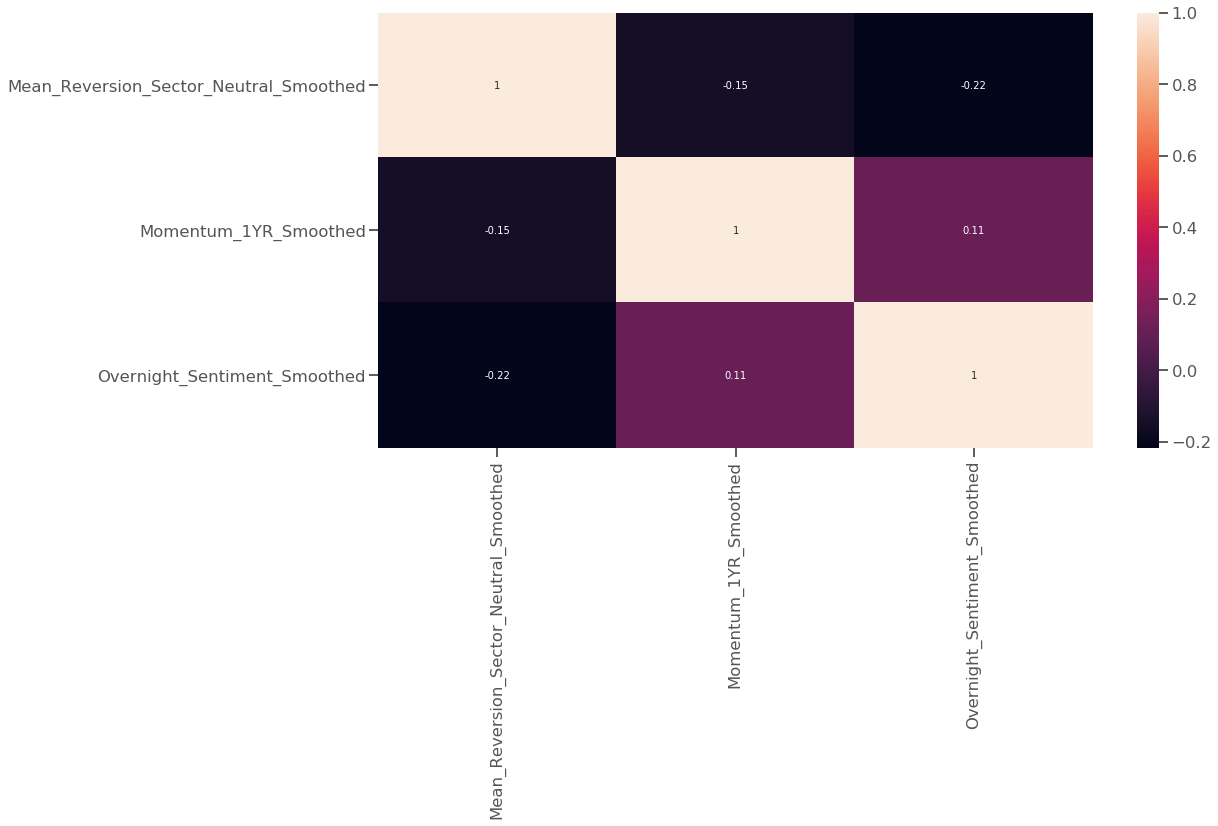

In [5]:
sns.heatmap(all_factors[alpha_factors].corr(),annot=True)
plt.show()

# Predictive Power

In [6]:
all_factors_smp[['is_January',
 'is_December',
 'month_start',
 'month_end',
 'qtr_end',
 'qtr_start']].astype(str).describe()

,is_January,is_December,month_start,month_end,qtr_end,qtr_start
count,71861,71861,71861,71861,71861,71861
unique,2,2,2,2,2,2
top,0,0,0,0,0,0
freq,66029,65980,68891,68639,70904,71028


In [7]:
all_factors_smp.groupby('month_start')[target_col].mean()

month_start
0    0.002748
1    0.002482
Name: target, dtype: float64

In [8]:
all_factors_smp.groupby('month_end')[target_col].mean()

month_end
0    0.002645
1    0.004682
Name: target, dtype: float64

In [9]:
all_factors_smp.groupby('is_January')[target_col].mean()

is_January
0    0.002750
1    0.002585
Name: target, dtype: float64

In [10]:
all_factors_smp.groupby('is_December')[target_col].mean()

is_December
0    0.002952
1    0.000319
Name: target, dtype: float64

In [11]:
all_factors_smp.groupby('qtr_end')[target_col].mean()

qtr_end
0    0.002676
1    0.007213
Name: target, dtype: float64

In [12]:
all_factors_smp.groupby('qtr_start')[target_col].mean()

qtr_start
0    0.002787
1   -0.001554
Name: target, dtype: float64

In [13]:
all_factors_smp.groupby('qtr_1')[target_col].mean()

qtr_1
0    0.002234
1    0.004340
Name: target, dtype: float64

In [14]:
all_factors_smp.groupby('qtr_2')[target_col].mean()

qtr_2
0    0.002795
1    0.002566
Name: target, dtype: float64

In [15]:
all_factors_smp.groupby('qtr_3')[target_col].mean()

qtr_3
0    0.003529
1    0.000429
Name: target, dtype: float64

In [16]:
all_factors_smp.groupby('qtr_4')[target_col].mean()

qtr_4
0    0.002402
1    0.003733
Name: target, dtype: float64

In [17]:
features_full = features_df.columns.tolist()

In [18]:
features = ['Mean_Reversion_Sector_Neutral_Smoothed', 'Momentum_1YR_Smoothed',
       'Overnight_Sentiment_Smoothed', 'adv_20d',
       'dispersion_120d', 'dispersion_20d', 'market_vol_120d','market_vol_20d', 'volatility_20d',
       'sector_code_-1', 'sector_code_0', 'sector_code_1', 'sector_code_2',
       'sector_code_3', 'sector_code_4', 'sector_code_5', 'sector_code_6',
       'sector_code_7', 'sector_code_8', 'sector_code_9', 'sector_code_10',
        'is_December', 'qtr_end', 'qtr_start']

In [19]:
features_nov = ['Mean_Reversion_Sector_Neutral_Smoothed', 'Momentum_1YR_Smoothed', 'Overnight_Sentiment_Smoothed',
 'adv_120d', 'adv_20d',
 'dispersion_120d', 'dispersion_20d',
 'market_vol_120d', 'market_vol_20d',
 'volatility_120d', 'volatility_20d',
 'is_January', 'is_December',
 'month_start', 'month_end',
 'qtr_end', 'qtr_start',
 'sector_code_-1', 'sector_code_0', 'sector_code_1', 'sector_code_2',
 'sector_code_3', 'sector_code_4', 'sector_code_5', 'sector_code_6',
 'sector_code_7', 'sector_code_8', 'sector_code_9', 'sector_code_10',
 'qtr_1', 'qtr_2', 'qtr_3', 'qtr_4']

# Alpha Factors Baseline

In [26]:
alphas_acc = [mle_utils.direction_accuracy_func(y_true=all_factors[target_col], y_pred=all_factors['Momentum_1YR_Smoothed'], kind='global'),
    mle_utils.direction_accuracy_func(y_true=all_factors[target_col], y_pred=all_factors['Mean_Reversion_Sector_Neutral_Smoothed'], kind='global'),
    mle_utils.direction_accuracy_func(y_true=all_factors[target_col], y_pred=all_factors['Overnight_Sentiment_Smoothed'], kind='global')]
alphas_acc = pd.Series()

In [45]:
alphas_wacc_by_yr[alpha_fac] = all_factors.groupby(all_factors.index.get_level_values(0).year)[[target_col, alpha_fac]].apply(
        lambda grp: mle_utils.direction_accuracy_func(y_true=grp[target_col], y_pred=grp[alpha_fac], kind='weighted', w_fp=2., w_fn=1.)
    )

In [46]:
alphas_wacc_by_yr

,Mean_Reversion_Sector_Neutral_Smoothed
date,
2013,0.418680
2014,0.411900
2015,0.402767


In [47]:
alphas_acc = pd.DataFrame(columns=['wacc', 'acc', 'acc_up', 'acc_down'], dtype=float)
yr_lst = all_factors.index.get_level_values(0).year.unique()
alphas_wacc_by_yr = pd.DataFrame(index = yr_lst, dtype=float)
for alpha_fac in ['Mean_Reversion_Sector_Neutral_Smoothed', 'Momentum_1YR_Smoothed', 'Overnight_Sentiment_Smoothed']:
    alphas_acc.loc[alpha_fac, 'wacc'] = mle_utils.direction_accuracy_func(
        y_true=all_factors[target_col], y_pred=all_factors[alpha_fac], kind='weighted', w_fp=2., w_fn=1.)
    alphas_acc.loc[alpha_fac, 'acc'] = mle_utils.direction_accuracy_func(
        y_true=all_factors[target_col], y_pred=all_factors[alpha_fac], kind='global')
    alphas_acc.loc[alpha_fac, 'acc_up'] = mle_utils.direction_accuracy_func(
        y_true=all_factors[target_col], y_pred=all_factors[alpha_fac], kind='upwards')
    alphas_acc.loc[alpha_fac, 'acc_down'] = mle_utils.direction_accuracy_func(
        y_true=all_factors[target_col], y_pred=all_factors[alpha_fac], kind='downwards')
    
    alphas_wacc_by_yr[alpha_fac] = all_factors.groupby(all_factors.index.get_level_values(0).year)[[target_col, alpha_fac]].apply(
        lambda grp: mle_utils.direction_accuracy_func(y_true=grp[target_col], y_pred=grp[alpha_fac], kind='weighted', w_fp=2., w_fn=1.)
    )

alphas_acc

,wacc,acc,acc_up,acc_down
Mean_Reversion_Sector_Neutral_Smoothed,0.410996,0.502641,0.502155,0.503237
Momentum_1YR_Smoothed,0.415359,0.507030,0.505987,0.508312
Overnight_Sentiment_Smoothed,0.410011,0.501614,0.501075,0.502275


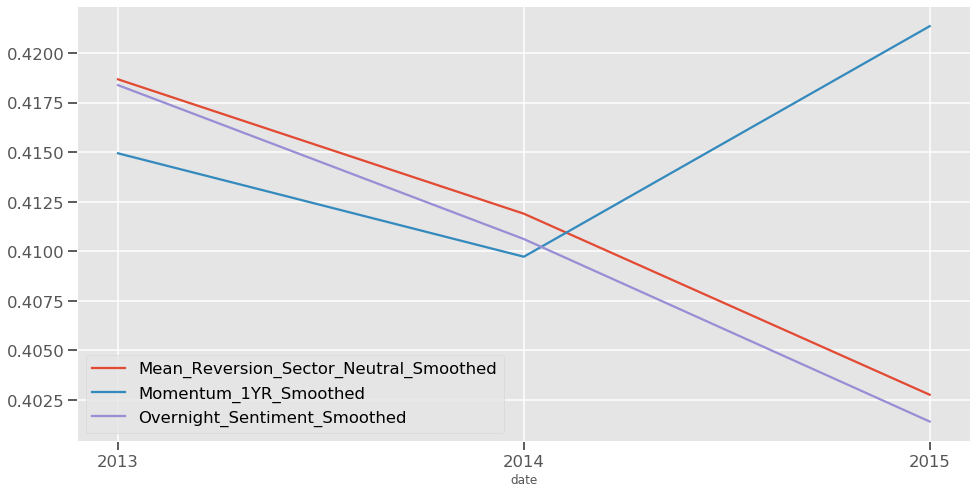

In [50]:
ax = alphas_wacc_by_yr.plot()
ax.locator_params(integer=True)